**DSCI100 Individual Project Planning Report:**

**Author:** Amber Facher

**GitHub Repository:** https://github.com/afacher/dsci_individual_project.git

This project uses two datasets provided by a UBC research group:
- `players.csv` contains a list of all unique players, including data about each player.
- `sessions.csv` contains a list of individual play sessions by each player, including data about the session.

Data was collected through an open, free, and public Minecraft server where all players are verified users as they must register themselves and sign a consent form to get the link to play. There have been over 10,000 players and recorded hours, but the provided datasets contain much fewer numbers.
  
The `players.csv` dataset has 196 observations and 7 variables, where each row represents a different player. The variables include:
- `experience`, a categorical variable that describes the player's level.
- `subscribe` a logical variable (TRUE, FALSE, or NA) which indicates if they are subscribed to a game-related newsletter.
- `hashedEmail`, character variable of a unique code for each player generated from their personal email (to keep it private).
- `played_hours`, numeric variable of the number of hours a player spent on the server.
- `name`, character variable of the player's first name.
- `gender`, categorical variable of the player's gender.
- `Age`, numeric variable of the player's age.

The `sessions.csv` dataset has 1,535 observations and 5 variables, where each row represents the individual play sessions. The variables include:
- `hashedEmail`, character variable of a unique code for each player generated from their personal email where the session that was played is linked to their encrypted email address.
- `start_time` and `end_time`, shows the session start or end time as character strings shown in the format DD/MM/YYYY HH:MM.
- `original_start_time` and `original_end_time`, numeric variable of the timestamp of the session's start or end time.

**Summary Statistics Insights:**

From the `players` dataset, the average age is 21.14 years, and players spend an average of 5.85 hours on the server. Most players (73%) are subscribed to a gaming-related newsletter, and majority identify as a male (63%). The majority experience level is Amateur (32%).

From the `sessions` dataset, the average original start time is 1.719201e+12 and the average original end time is 1.719196e+12. We also see that most players only had a few gaming sessions. Note: hashedEmail has a summary from the sessions dataset and not players because each row in players is a different user. In the sessions dataset, each row is a logged gaming session, so a single user can have multiple gaming sessions. Also, I did not provide a summary for the start_time and end_time variables as they are in date&time format and I could not find a way to get the mean of this; we have not learned how to do so.

**Potential Issues in the Data:**

- Numerical variables can have NA values and we must decide what to do with them.
- In the sessions dataset, some players record far more gaming sessions on the server than others, which could alter some analyses.
- The values in original_start_time and original_end_time are very difficult to read or understand.

**Broad Question:**

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:**

"Do players who subscribe to the newsletter have higher experience levels than non-subscribers?"
(Can `subscribe` predict `experience` in `players`?)

I will use the `players.csv` file, which includes the `subscribe` and `experience` variables. I will wrangle my data by checking for and handling missing values, and ensure the categorical variables are in a form ready for analysis.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# loading in the datasets

players <- read_csv("project_data/players.csv")
sessions <- read_csv("project_data/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# summary statistics for players

# numerical variables in players
mean_values_players <- players |>
    summarize(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
        mean_age = round(mean(Age, na.rm = TRUE), 2))

mean_values_players

# categorical variables in players

experience_summary <- players |>
    group_by(experience) |>
    summarize(
        Count = n(),
        Proportion = round(Count / nrow(players), 2))

subscribe_summary <- players |>
    group_by(subscribe) |>
    summarize(
        Count = n(),
        Proportion = round(Count / nrow(players), 2))

gender_summary <- players |>
    group_by(gender) |>
    summarize(
        Count = n(),
        Proportion = round(Count / nrow(players), 2))

experience_summary
subscribe_summary
gender_summary

# summary statistics for sessions

# numerical variables in sessions
mean_values_sessions <- sessions |>
    summarize(
        mean_original_start_time = round(mean(original_start_time, na.rm = TRUE), 2),
        mean_original_end_time = round(mean(original_end_time, na.rm = TRUE), 2))

mean_values_sessions


# number of sessions per player
hashedEmail_summary <- sessions |>
    group_by(hashedEmail) |>
    summarize(
        Count = n(),
        Proportion = round(Count / nrow(sessions), 2))     

hashedEmail_summary        


mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


experience,Count,Proportion
<chr>,<int>,<dbl>
Amateur,63,0.32
Beginner,35,0.18
Pro,14,0.07
Regular,36,0.18
Veteran,48,0.24


subscribe,Count,Proportion
<lgl>,<int>,<dbl>
FALSE,52,0.27
TRUE,144,0.73


gender,Count,Proportion
<chr>,<int>,<dbl>
Agender,2,0.01
Female,37,0.19
Male,124,0.63
⋮,⋮,⋮
Other,1,0.01
Prefer not to say,11,0.06
Two-Spirited,6,0.03


mean_original_start_time,mean_original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


hashedEmail,Count,Proportion
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,0
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,0.2
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,0.0
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,0.0


We will only be working with the `players` dataset for the rest of the project. 

We see that the data is already relatively tidy: each row is a single observation, each column is a single variable, and each value is a single cell. Since we will be working with the `experience` and `subscribe` variables, the only wrangling we must do is to ensure they are factors. Since the `subscribe` variable is of *logical* type, we only need to check if the `experience` variable is a factor.

In [4]:
# wrangling the data. 

is.factor(players$experience)

players <- players |>
    mutate(experience = as_factor(experience))
       

[1] FALSE

From the summary statistics, we can report the mean values of each quantitative variable in the `players` dataset in a table below. 

In [5]:
mean_values_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


We want to produce some exploratory visuals to help better understand the relationship between a player's experience level and their subscription status. Below, I made 2 visualizations. 

1. The first plot shows the proportion of subscribed players for each experience level. We see that throughout all experience levels, most players are subscribed to a game-related newsletter, and the proportions do not differ by much. However, the highest amounts come from the *Beginner* and *Amateur* categories.
2. The second plot shows the count of subscribers and non-subscribers for each experience level. From this plot, we notice that the highest number of subscribers comes from the *Amateur* and *Veteran* categories. Each experience level has much more subscribers than non subscribers, similar to what we saw in the first plot, but has context on the count.

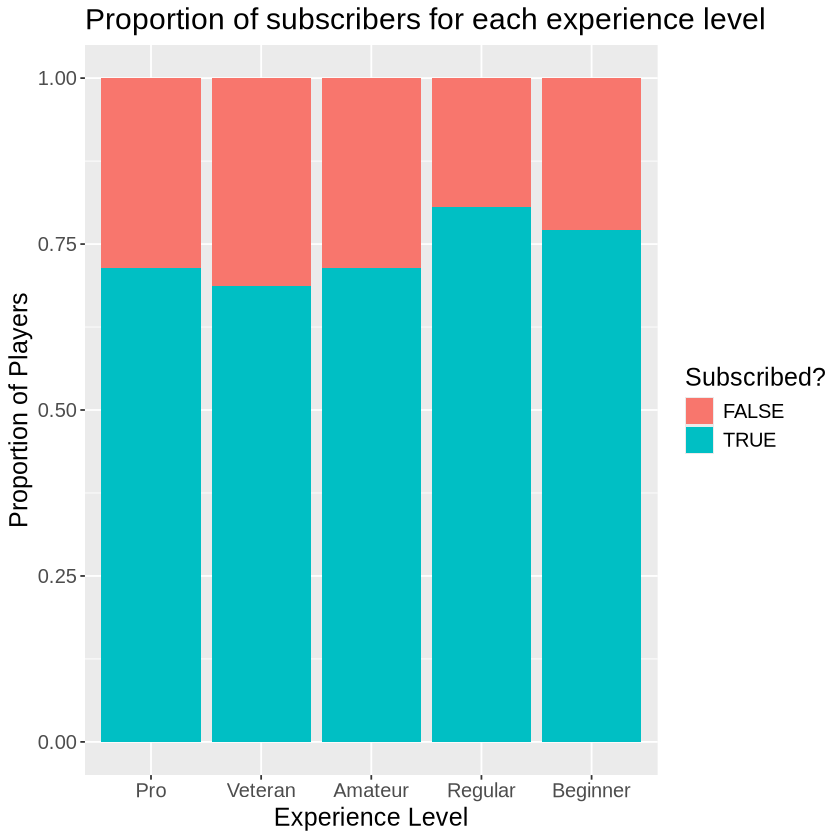

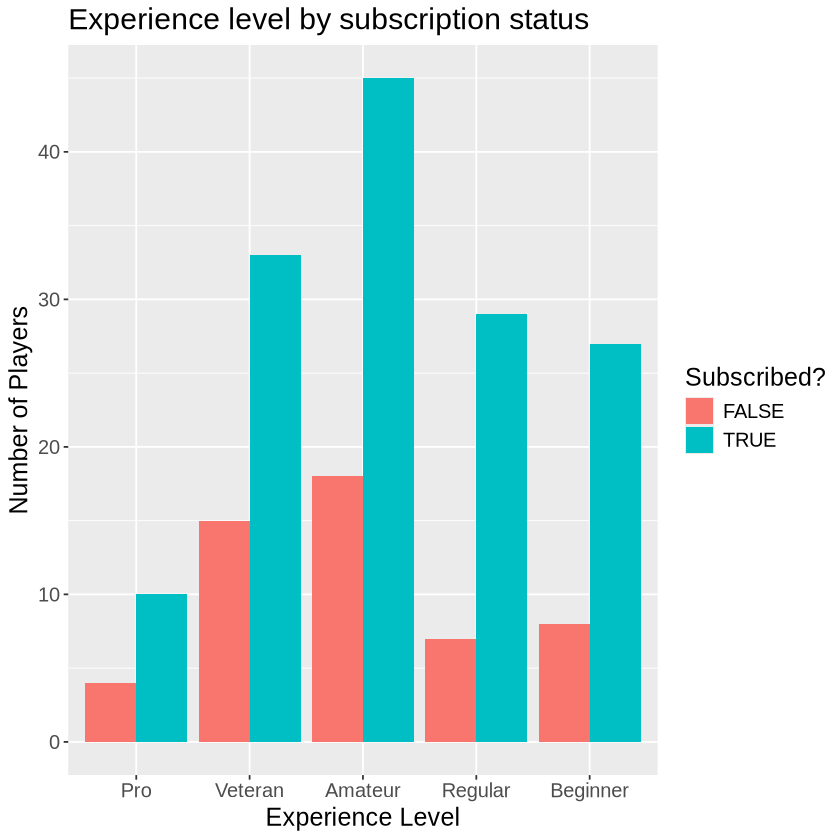

In [6]:
players_bar_plot_prop <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Experience Level",
         y = "Proportion of Players",
         title = "Proportion of subscribers for each experience level",
         fill = "Subscribed?") +
    theme(text = element_text(size = 15))

players_bar_plot_prop

players_bar_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(x = "Experience Level",
         y = "Number of Players",
         title = "Experience level by subscription status",
         fill = "Subscribed?") +
    theme(text = element_text(size = 15))

players_bar_plot

**Proposed method:**

I will use classification with k-nearest neighbours to predict a player's experience level based on their subscription to a game-related newsletter. I will be using k-nn classification because my response variable: `experience` is categorical. Also, my explanatory variable: `subscribed` is logical, which we can treat as a binary categorical variable. This is an appropriate method as we are using one or more variables to predict the value of a categorical variable of interest.

- Assumptions: I am assuming that we can discover a relationship between the variables by comparing the similarity to nearby observations. Also, I am making the assumption that the data will be properly wrangled, tidy, and scaled so the k-nn algorithm can correctly make a prediction based on the nearest observations.

- Potential limitations: With k-nn, we want to make sure roughly the same amount of data points appear for each category. The model will not perform well if some categories are significantly larger than the others, as it will always just lean to predict those answers. Also, our k-nn model won't predict very well the variables we chose are not informative enough or irrelvant to the question.

- Data preprocessing: I will be splitting the data into training (70%) and testing (30%), which is a common split we did several times in worksheets and tutorials. It will be split before we fit the model. I will have to handle any missing values in the columns and convert them to factors like we did above (if not continued on this same notebook). Yes, I will use cross-validation (on the training set!) to find the best k value.